In [4]:
import os
import pandas as pd

def process_csv_files(input_dir, target_dir, output_dir, columns_to_extract):
    """
    Process CSV files by extracting specified columns from input files, 
    merging the 'facies' column from target files with matching depths, 
    and saving them in the output directory.
    
    Parameters:
    - input_dir: Path to the input directory containing input CSV files.
    - target_dir: Path to the target directory containing target CSV files.
    - output_dir: Path to the output directory for saving processed CSV files.
    - columns_to_extract: List of column names to extract from the input files.
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Process each file in the input directory
    for file_name in os.listdir(input_dir):
        if file_name.endswith('.csv'):
            input_path = os.path.join(input_dir, file_name)
            
            # Construct the corresponding target file name by appending '_facies.csv'
            target_file_name = file_name.replace('.csv', '_facies.csv')
            target_path = os.path.join(target_dir, target_file_name)
            output_path = os.path.join(output_dir, file_name)
            
            # Check if the corresponding target file exists
            if os.path.isfile(input_path) and os.path.isfile(target_path):
                # Read the input CSV file
                input_df = pd.read_csv(input_path)
                
                # Check if all specified columns exist in the input file
                if not all(column in input_df.columns for column in columns_to_extract):
                    print(f"Skipping {file_name} - missing columns in input file")
                    continue
                
                # Read the target CSV file
                target_df = pd.read_csv(target_path)
                
                # Ensure target_df has the required columns ('depth' and 'facies')
                if 'depth' not in target_df.columns or 'facies' not in target_df.columns:
                    print(f"Skipping {file_name} - target file missing 'depth' or 'facies' column")
                    continue
                
                # Extract specified columns from the input file
                extracted_df = input_df[columns_to_extract].copy()
                
                # Merge on matching 'dept' and 'depth' values
                merged_df = extracted_df.merge(target_df[['depth', 'facies']], left_on='dept', right_on='depth', how='left')
                
                # Drop the 'depth' column from the target file after merging
                merged_df.drop(columns=['depth'], inplace=True)
                
                # Save the combined data to the output directory
                merged_df.to_csv(output_path, index=False)
                print(f"Processed and saved: {output_path}")
            else:
                print(f"Skipping {file_name} - corresponding target file '{target_file_name}' not found")

# Example usage
input_dir = '/gpt/data3/KURC/users/makamx0a/data/Tasks/Classification/MNIF/processed/input'
target_dir = '/gpt/data3/KURC/users/makamx0a/data/Tasks/Classification/MNIF/processed/target'
output_dir = '/gpt/data3/KURC/users/makamx0a/data/segmentation'
columns_to_extract = [
    'dept', 'perm', 'gr', 'rhobr','cali'
]

process_csv_files(input_dir, target_dir, output_dir, columns_to_extract)

Processed and saved: /gpt/data3/KURC/users/makamx0a/data/segmentation/MNIF_716_0.csv
Processed and saved: /gpt/data3/KURC/users/makamx0a/data/segmentation/MNIF_637_4.csv
Skipping MNIF_201_0.csv - missing columns in input file
Processed and saved: /gpt/data3/KURC/users/makamx0a/data/segmentation/MNIF_692_1.csv
Processed and saved: /gpt/data3/KURC/users/makamx0a/data/segmentation/MNIF_22_0.csv
Processed and saved: /gpt/data3/KURC/users/makamx0a/data/segmentation/MNIF_637_2.csv
Processed and saved: /gpt/data3/KURC/users/makamx0a/data/segmentation/MNIF_317_0.csv
Skipping MNIF_444_0.csv - missing columns in input file
Skipping MNIF_465_1.csv - missing columns in input file
Skipping MNIF_296_0.csv - missing columns in input file
Processed and saved: /gpt/data3/KURC/users/makamx0a/data/segmentation/MNIF_34_0.csv
Processed and saved: /gpt/data3/KURC/users/makamx0a/data/segmentation/MNIF_246_0.csv
Processed and saved: /gpt/data3/KURC/users/makamx0a/data/segmentation/MNIF_36_0.csv
Processed and 

In [66]:
import matplotlib.pyplot as plt
import numpy as np

def read_processed_file(file_path):
    """
    Reads the processed CSV file into a pandas DataFrame.
    
    Parameters:
    - file_path: Path to the processed CSV file.
    
    Returns:
    - DataFrame containing the data.
    """
    return pd.read_csv(file_path)



def plot_channels_with_facies(data, columns_to_plot, depth_col='dept', facies_col='facies', default_value=np.nan):
    """
    Plots each channel in `columns_to_plot` on a separate subplot, using `facies` as the color.
    Missing facies and column data are handled with separate colors or default values.
    
    Parameters:
    - data: DataFrame containing the data to plot.
    - columns_to_plot: List of column names to plot.
    - depth_col: Name of the depth column to use on the x-axis.
    - facies_col: Name of the facies column to use for coloring the trace.
    - default_value: Value to use for missing column data. Defaults to NaN.
    """
    num_plots = len(columns_to_plot)
    fig, axes = plt.subplots(num_plots, 1, figsize=(10, num_plots * 3), sharex=True)
    
    # Ensure axes is always a list, even if there's only one plot
    if num_plots == 1:
        axes = [axes]
    
    # Fill missing data in each specified column with the default value
    data = data.fillna({col: default_value for col in columns_to_plot})
    
    for i, column in enumerate(columns_to_plot):
        ax = axes[i]
        
        # Plot each segment with different colors based on facies values
        unique_facies = data[facies_col].unique()
        ax.plot(data[depth_col], data[column], lw=0.5, alpha=0.5, color='black')
        for facies in unique_facies:
            # Handle missing facies values with a separate color
            facies_data = data[data[facies_col] == facies]
            label = f'Facies {facies}' if not pd.isnull(facies) else 'Missing Facies'
            color = 'gray' if pd.isnull(facies) else None  # Use gray for missing facies
            
            ax.scatter(facies_data[depth_col], facies_data[column], label=label, color=color, alpha=0.7, s=1.5)
        
        # Labeling
        ax.set_ylabel(column)
        ax.legend(title=facies_col, loc='upper right')
        ax.grid(True)
    
    # Set the shared x-axis label
    plt.xlabel(depth_col)
    plt.tight_layout()
    plt.show()

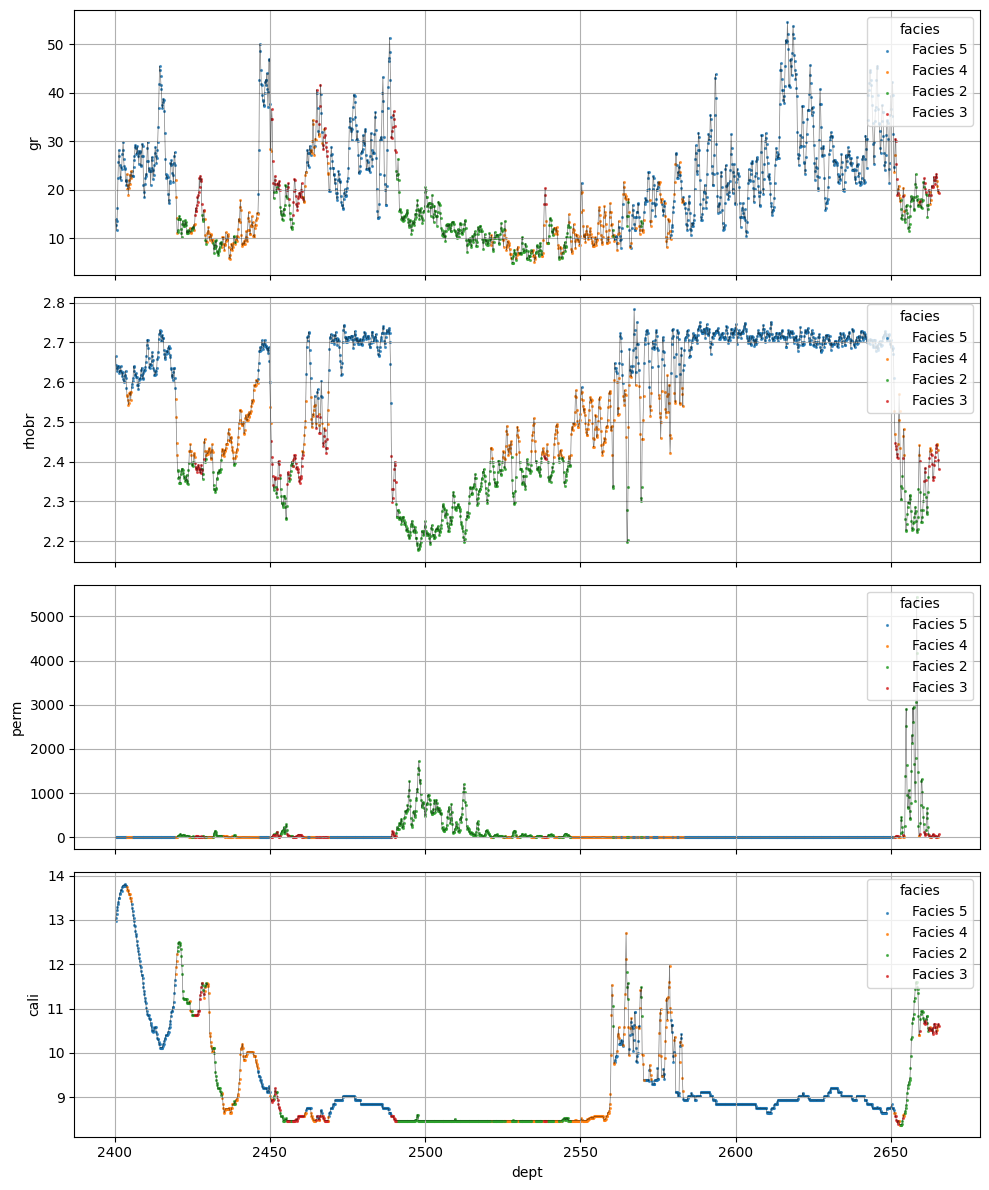

In [39]:
data = read_processed_file("/gpt/data3/KURC/users/makamx0a/data/segmentation/MNIF_59_0.csv")
plot_channels_with_facies(data, ['gr', 'rhobr', 'perm', 'cali'])

In [42]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

def load_processed_data(file_path, feature_columns, target_col='facies'):
    """
    Load processed CSV data, select features and target column, handle missing values.
    
    Parameters:
    - file_path: Path to the processed CSV file.
    - feature_columns: List of feature column names to use for prediction.
    - target_col: Name of the target column (facies).
    
    Returns:
    - X: DataFrame of feature columns.
    - y: Series of target values.
    """
    data = pd.read_csv(file_path)
    
    # Drop rows with missing facies since they can't be used for training
    data = data.dropna(subset=[target_col])
    
    # Select features and target
    X = data[feature_columns]
    y = data[target_col]
    
    return X, y

def train_and_evaluate_model(X, y):
    """
    Train a Random Forest model to predict facies and evaluate its performance.
    
    Parameters:
    - X: DataFrame of feature columns.
    - y: Series of target values (facies).
    
    Returns:
    - model: Trained Random Forest model.
    """
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define a pipeline with imputer and classifier
    model_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model_pipeline.predict(X_test)
    print("Model Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    return model_pipeline

# Example usage
# Define the file path for processed data
processed_file_path = "/gpt/data3/KURC/users/makamx0a/data/segmentation/MNIF_59_0.csv"

# Define the features to use for prediction
feature_columns = ['dept', 'gr', 'rhobr', 'perm', 'cali']  # Replace with actual channel names

# Load the data
X, y = load_processed_data(processed_file_path, feature_columns)

# Train and evaluate the model
model = train_and_evaluate_model(X, y)

Model Accuracy: 0.9742120343839542
              precision    recall  f1-score   support

           2       0.96      0.99      0.97        96
           3       1.00      0.78      0.88        32
           4       0.94      1.00      0.97        76
           5       1.00      0.99      1.00       145

    accuracy                           0.97       349
   macro avg       0.97      0.94      0.95       349
weighted avg       0.98      0.97      0.97       349



In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.preprocessing import LabelEncoder

def calculate_feature_importance(X, y):
    """
    Calculate feature importance using ANOVA F-value, Mutual Information,
    and Random Forest importance for the features in relation to facies.
    
    Parameters:
    - X: DataFrame of features.
    - y: Series of facies labels.
    
    Returns:
    - feature_importances: DataFrame of feature importance scores for each metric.
    """
    # Calculate ANOVA F-values
    f_values, _ = f_classif(X, y)
    
    # Calculate Mutual Information
    mi_scores = mutual_info_classif(X, y, random_state=42)
    
    # Train a Random Forest to calculate feature importance
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    rf_importances = rf.feature_importances_
    
    # Combine into a DataFrame for easy comparison
    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'ANOVA_F_value': f_values,
        'Mutual_Information': mi_scores,
        'Random_Forest_Importance': rf_importances
    })
    
    # Sort by importance (choose a preferred metric, e.g., ANOVA F-value)
    feature_importances.sort_values(by='ANOVA_F_value', ascending=False, inplace=True)
    
    return feature_importances

importance_scores = calculate_feature_importance(X, y)
print(importance_scores)

  Feature  ANOVA_F_value  Mutual_Information  Random_Forest_Importance
2   rhobr    6462.802553            1.014397                  0.463830
1      gr     483.901337            0.407187                  0.125057
3    perm     165.280485            0.859838                  0.306815
0    dept      35.533768            1.038454                  0.044882
4    cali      13.064181            0.478162                  0.059416


In [54]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.preprocessing import LabelEncoder

def load_multiple_files(data_dir, feature_columns, target_col='facies'):
    """
    Load data from multiple CSV files in the specified directory,
    select features and target column, and concatenate into a single dataset.
    
    Parameters:
    - data_dir: Directory containing CSV files.
    - feature_columns: List of feature column names to use for prediction.
    - target_col: Name of the target column (facies).
    
    Returns:
    - X: DataFrame of concatenated feature columns from all files.
    - y: Series of concatenated target values from all files.
    """
    X_list = []
    y_list = []
    
    for file_name in os.listdir(data_dir):
        if file_name.endswith('.csv'):
            file_path = os.path.join(data_dir, file_name)
            data = pd.read_csv(file_path)
            
            # Drop rows with missing target column (facies)
            data = data.dropna(subset=[target_col])
            
            # Extract features and target, and append to lists
            X_list.append(data[feature_columns])
            y_list.append(data[target_col])
    
    # Concatenate all samples into a single DataFrame
    X = pd.concat(X_list, ignore_index=True)
    y = pd.concat(y_list, ignore_index=True)
    
    return X, y

def calculate_feature_importance(X, y, drop_nans=False):
    """
    Calculate feature importance using ANOVA F-value, Mutual Information,
    and Random Forest importance for the features in relation to facies.
    
    Parameters:
    - X: DataFrame of features.
    - y: Series of facies labels.
    - drop_nans: Boolean, if True drops rows with NaNs; if False, imputes missing values with column mean.
    
    Returns:
    - feature_importances: DataFrame of feature importance scores for each metric.
    """
    if drop_nans:
        # Drop rows with any NaN values
        X_clean = X.dropna()
        y_clean = y[X_clean.index]  # Align target values with remaining indices
    else:
        # Impute missing values with the mean of each column
        imputer = SimpleImputer(strategy='mean')
        X_clean = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
        y_clean = y  # No need to adjust y in this case
    
    # Calculate ANOVA F-values
    f_values, _ = f_classif(X_clean, y_clean)
    
    # Calculate Mutual Information
    mi_scores = mutual_info_classif(X_clean, y_clean, random_state=42)
    
    # Train a Random Forest to calculate feature importance
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_clean, y_clean)
    rf_importances = rf.feature_importances_
    
    # Combine into a DataFrame for easy comparison
    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'ANOVA_F_value': f_values,
        'Mutual_Information': mi_scores,
        'Random_Forest_Importance': rf_importances
    })
    
    # Sort by importance (choose a preferred metric, e.g., ANOVA F-value)
    feature_importances.sort_values(by='ANOVA_F_value', ascending=False, inplace=True)
    
    return feature_importances

# Define the features to use for prediction
feature_columns = ['dept', 'gr', 'rhobr', 'perm', 'cali']  # Replace with actual channel names
data_dir = '/gpt/data3/KURC/users/makamx0a/data/segmentation/'
X, y = load_multiple_files(data_dir, feature_columns)
calculate_feature_importance(X, y)

,Feature,ANOVA_F_value,Mutual_Information,Random_Forest_Importance
2,rhobr,1.076007e+06,1.099987,0.561759
1,gr,6.536768e+04,0.480555,0.195928
3,perm,2.678240e+04,0.855244,0.211688
4,cali,1.236949e+04,0.209632,0.016080
0,dept,1.023556e+04,0.135552,0.014546


In [56]:
from sklearn.preprocessing import StandardScaler

def calculate_feature_importance(X, y, drop_nans=False):
    """
    Calculate feature importance using ANOVA F-value, Mutual Information,
    and Random Forest importance for the features in relation to facies, with normalization.
    
    Parameters:
    - X: DataFrame of features.
    - y: Series of facies labels.
    - drop_nans: Boolean, if True drops rows with NaNs; if False, imputes missing values with column mean.
    
    Returns:
    - feature_importances: DataFrame of feature importance scores for each metric.
    """
    if drop_nans:
        # Drop rows with any NaN values
        X_clean = X.dropna()
        y_clean = y[X_clean.index]  # Align target values with remaining indices
    else:
        # Impute missing values with the mean of each column
        imputer = SimpleImputer(strategy='mean')
        X_clean = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
        y_clean = y  # No need to adjust y in this case
    
    # Normalize the features
    scaler = StandardScaler()
    X_normalized = pd.DataFrame(scaler.fit_transform(X_clean), columns=X_clean.columns)
    
    # Calculate ANOVA F-values
    f_values, _ = f_classif(X_normalized, y_clean)
    
    # Calculate Mutual Information
    mi_scores = mutual_info_classif(X_normalized, y_clean, random_state=42)
    
    # Train a Random Forest to calculate feature importance
    rf = RandomForestClassifier(n_estimators=50, random_state=42)
    rf.fit(X_normalized, y_clean)
    rf_importances = rf.feature_importances_
    
    # Combine into a DataFrame for easy comparison
    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'ANOVA_F_value': f_values,
        'Mutual_Information': mi_scores,
        'Random_Forest_Importance': rf_importances
    })
    
    # Sort by importance (choose a preferred metric, e.g., ANOVA F-value)
    feature_importances.sort_values(by='ANOVA_F_value', ascending=False, inplace=True)
    
    return feature_importances


feature_importance = calculate_feature_importance(X, y)

In [58]:
print(feature_importance)

  Feature  ANOVA_F_value  Mutual_Information  Random_Forest_Importance
2   rhobr   1.076007e+06            1.099984                  0.565098
1      gr   6.536768e+04            0.480560                  0.193929
3    perm   2.678240e+04            0.855239                  0.210174
4    cali   1.236949e+04            0.209633                  0.016070
0    dept   1.023556e+04            0.135553                  0.014730


In [83]:
# Train and evaluate the model
def train_and_evaluate_model(X, y):
    """
    Train a Random Forest model to predict facies and evaluate its performance.
    
    Parameters:
    - X: DataFrame of feature columns.
    - y: Series of target values (facies).
    
    Returns:
    - model: Trained Random Forest model.
    """
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define a pipeline with imputer and classifier
    model_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model_pipeline.predict(X_test)
    print("Model Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    return model_pipeline
    
feature_columns = ['rhobr', 'gr']   # Replace with actual channel names
# ['gr', 'rhobr', 'perm', 'cali']
data_dir = '/gpt/data3/KURC/users/makamx0a/data/segmentation/'
X, y = load_multiple_files(data_dir, feature_columns)
model = train_and_evaluate_model(X, y)

Model Accuracy: 0.9976778579212288
              precision    recall  f1-score   support

           2       1.00      1.00      1.00     32356
           3       0.99      1.00      1.00     10525
           4       1.00      1.00      1.00     15791
           5       1.00      1.00      1.00     16243
           6       0.99      1.00      1.00      2169

    accuracy                           1.00     77084
   macro avg       1.00      1.00      1.00     77084
weighted avg       1.00      1.00      1.00     77084



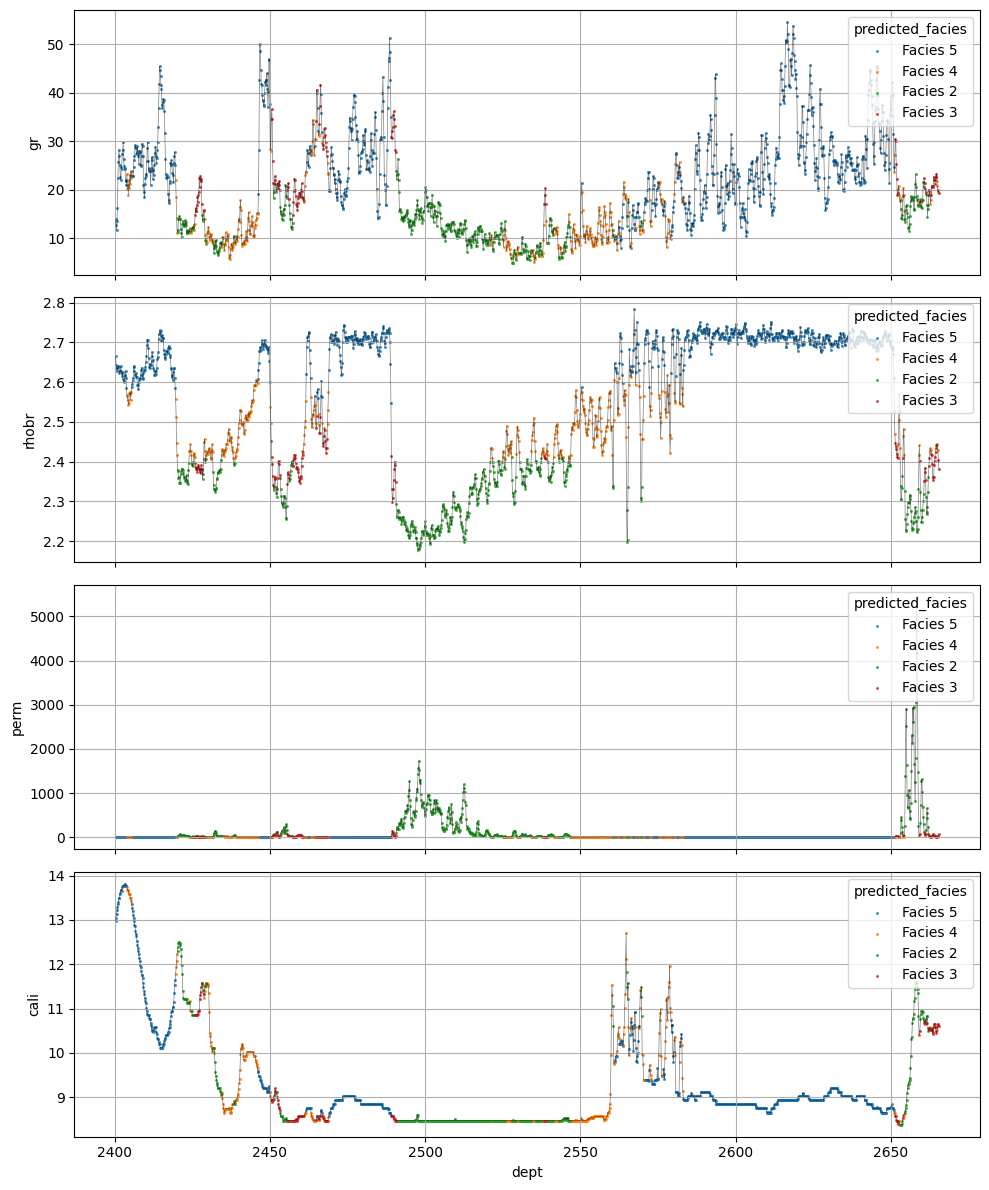

In [67]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the previously defined plotting function
def plot_channels_with_facies_points(data, columns_to_plot, depth_col='dept', facies_col='facies', default_value=np.nan):
    num_plots = len(columns_to_plot)
    fig, axes = plt.subplots(num_plots, 1, figsize=(10, num_plots * 3), sharex=True)
    
    if num_plots == 1:
        axes = [axes]
    
    data = data.fillna({col: default_value for col in columns_to_plot})
    
    for i, column in enumerate(columns_to_plot):
        ax = axes[i]
        
        unique_facies = data[facies_col].unique()
        for facies in unique_facies:
            facies_data = data[data[facies_col] == facies]
            label = f'Facies {facies}' if not pd.isnull(facies) else 'Missing Facies'
            color = 'gray' if pd.isnull(facies) else None
            
            ax.scatter(facies_data[depth_col], facies_data[column], label=label, color=color, s=10, alpha=0.7)
        
        ax.set_ylabel(column)
        ax.legend(title=facies_col, loc='upper right')
        ax.grid(True)
    
    plt.xlabel(depth_col)
    plt.tight_layout()
    plt.show()

# Load trace data from CSV file and infer labels
def inference_and_plot(model, trace_file_path, feature_columns, depth_col='dept', plot_columns=['pay', 'rop', 'vanh']):
    """
    Run inference on trace data from a CSV file using a trained model, then plot the result.
    
    Parameters:
    - model: Trained model for inference.
    - trace_file_path: Path to the CSV file containing trace data.
    - feature_columns: List of feature column names used for prediction.
    - depth_col: Column for depth values.
    - plot_columns: Columns to be plotted with inferred labels.
    """
    # Load trace data
    trace_data = pd.read_csv(trace_file_path)
    
    # Ensure feature columns are available and preprocess
    trace_X = trace_data[feature_columns].copy()
    trace_X = trace_X.fillna(trace_X.mean())  # Impute missing values with mean (if needed)
    
    # Perform inference to get predicted facies labels
    trace_data['predicted_facies'] = model.predict(trace_X)
    
    # Retrain model on the inferred labels (optional)
    X_train = trace_X
    y_train = trace_data['predicted_facies']
    model.fit(X_train, y_train)
    
    # Plot the result with inferred facies labels
    plot_channels_with_facies(trace_data, plot_columns, depth_col=depth_col, facies_col='predicted_facies')

# Example of Training and Inference

inference_and_plot(model, "/gpt/data3/KURC/users/makamx0a/data/segmentation/MNIF_59_0.csv", feature_columns, plot_columns=feature_columns[1:])

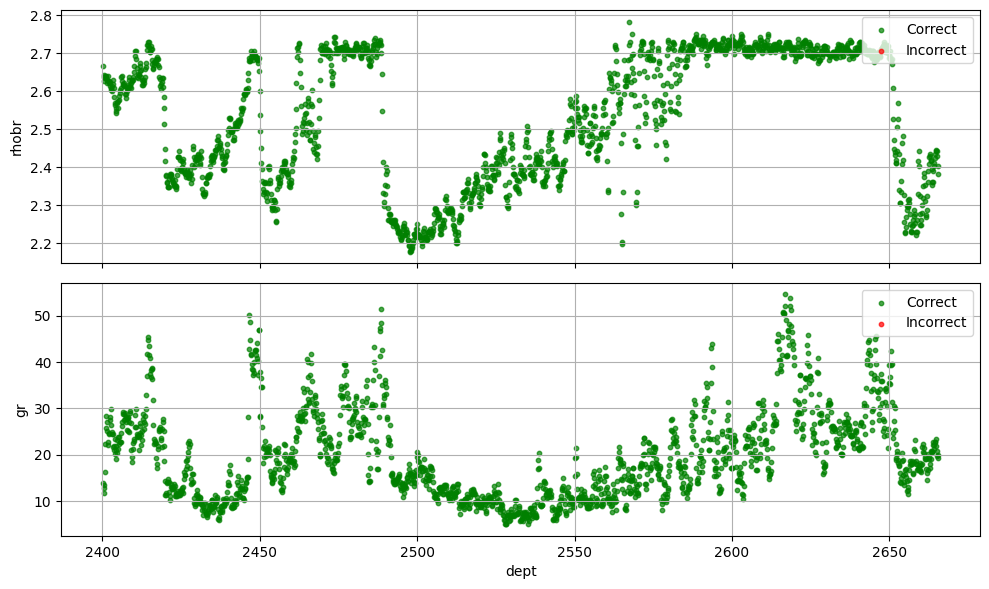

In [84]:
def plot_correct_incorrect_predictions(data, columns_to_plot, depth_col='dept', true_facies_col='facies', pred_facies_col='predicted_facies', default_value=np.nan):
    """
    Plots each channel in `columns_to_plot` on a separate subplot, with colors
    indicating correct (green) and incorrect (red) predictions.
    
    Parameters:
    - data: DataFrame containing the data to plot.
    - columns_to_plot: List of column names to plot.
    - depth_col: Name of the depth column to use on the x-axis.
    - true_facies_col: Name of the column containing the true facies labels.
    - pred_facies_col: Name of the column containing the predicted facies labels.
    - default_value: Value to use for missing column data.
    """
    num_plots = len(columns_to_plot)
    fig, axes = plt.subplots(num_plots, 1, figsize=(10, num_plots * 3), sharex=True)
    
    if num_plots == 1:
        axes = [axes]
    
    data = data.fillna({col: default_value for col in columns_to_plot})
    
    # Define color map for correctness
    correct_color = 'green'
    incorrect_color = 'red'
    
    for i, column in enumerate(columns_to_plot):
        ax = axes[i]
        
        # Correct and incorrect points
        correct = data[data[true_facies_col] == data[pred_facies_col]]
        incorrect = data[data[true_facies_col] != data[pred_facies_col]]
        
        # Plot correct predictions in green
        ax.scatter(correct[depth_col], correct[column], color=correct_color, label='Correct', s=10, alpha=0.7)
        
        # Plot incorrect predictions in red
        ax.scatter(incorrect[depth_col], incorrect[column], color=incorrect_color, label='Incorrect', s=10, alpha=0.7)
        
        # Labeling
        ax.set_ylabel(column)
        ax.legend(loc='upper right')
        ax.grid(True)
    
    plt.xlabel(depth_col)
    plt.tight_layout()
    plt.show()

# Load trace data from CSV file and infer labels
def inference_and_plot(model, trace_file_path, feature_columns, depth_col='dept', plot_columns=['pay', 'rop', 'vanh']):
    """
    Run inference on trace data from a CSV file using a trained model, then plot the result.
    
    Parameters:
    - model: Trained model for inference.
    - trace_file_path: Path to the CSV file containing trace data.
    - feature_columns: List of feature column names used for prediction.
    - depth_col: Column for depth values.
    - plot_columns: Columns to be plotted with inferred labels.
    """
    # Load trace data
    trace_data = pd.read_csv(trace_file_path)
    
    # Ensure feature columns are available and preprocess
    trace_X = trace_data[feature_columns].copy()
    trace_X = trace_X.fillna(trace_X.mean())  # Impute missing values with mean (if needed)
    
    # Perform inference to get predicted facies labels
    trace_data['predicted_facies'] = model.predict(trace_X)
    
    # Retrain model on the inferred labels (optional)
    X_train = trace_X
    y_train = trace_data['predicted_facies']
    model.fit(X_train, y_train)
    
    # Plot the result with correctness indication
    plot_correct_incorrect_predictions(trace_data, plot_columns, depth_col=depth_col, true_facies_col='facies', pred_facies_col='predicted_facies')

inference_and_plot(model, "/gpt/data3/KURC/users/makamx0a/data/segmentation/MNIF_59_0.csv", feature_columns, plot_columns=feature_columns)